##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

### Set up workspace

In [1]:
import sys
sys.path.append('../')

In [4]:
######################## Load modules ###################################
%matplotlib inline
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series
from plants_and_TCR.generate_figures import plot_scatter_CMIP

####################### Set up directory structure ######################
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

# Calculate TCRs

In [ ]:
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['RAD','TOT','PHYS','TOT-RAD'],
                                                         average_types=['global','land'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=True)

bcc-csm1-1
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
CanESM2
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> del

In [31]:
end_yr = 70
cmip_cutoff = 8

In [32]:
globalTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='global',
                                              tcr_types=['RAD','TOT'])
globalTCR_CMIP5 = globalTCR[0:cmip_cutoff]
globalTCR_CMIP6 = globalTCR[cmip_cutoff:len(globalTCR)]

In [36]:
globalTCR['RAD_pct'] = globalTCR['RAD']*100/globalTCR['TOT']
globalTCR.round(2)

,RAD,TOT,RAD_pct
bcc-csm1-1,1.67,1.73,96.52
CanESM2,2.16,2.34,92.05
CESM1-BGC,1.56,1.68,93.15
GFDL-ESM2M,1.35,1.35,99.92
HadGEM2-ES,2.01,2.52,79.86
IPSL-CM5A-LR,1.97,2.00,98.34
NorESM1-ME,1.42,1.56,90.79
MPI-ESM-LR,1.95,2.02,96.38
CNRM-ESM2-1,1.80,1.84,97.49
BCC-CSM2-MR,1.66,1.73,95.80


### Figure 4

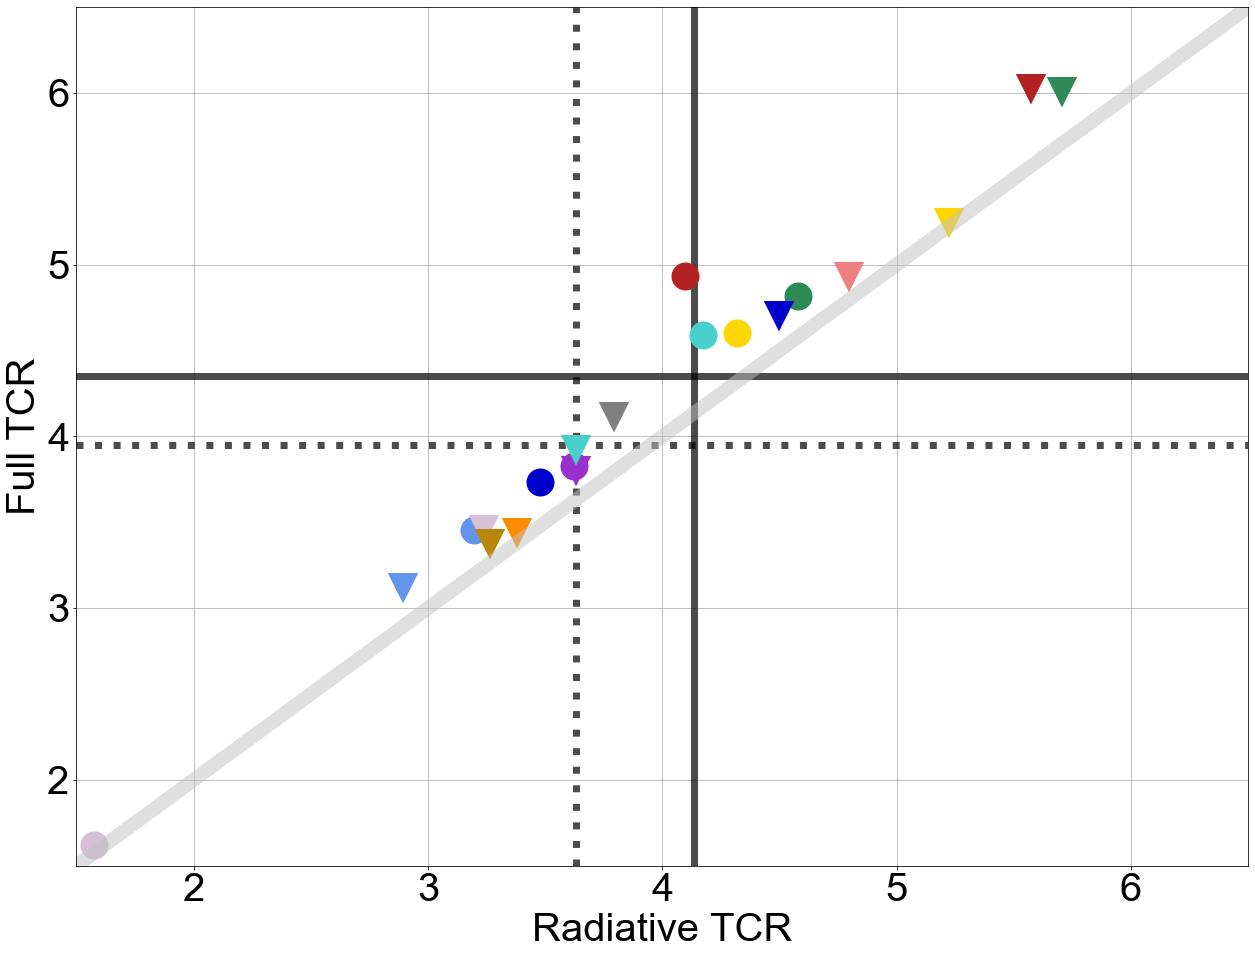

In [30]:
xvals = globalTCR['RAD'].values
yvals = globalTCR['TOT'].values

XLIMS = [1.5,6.5];
YLIMS = [1.5,6.5];
XLABEL = 'Radiative TCR';
YLABEL = 'Full TCR';
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    one_to_one_line=True,
                                    xlims=XLIMS, ylims=YLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, filled=True)

In [22]:
landTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='land',
                                              tcr_types=['RAD','TOT'])
landTCR_CMIP5 = landTCR[0:cmip_cutoff]
landTCR_CMIP6 = landTCR[cmip_cutoff:len(landTCR)]

### Run Stats

***Need to update this!!***

****
CMIP5: RAD vs. TOT
slope: 1.2265504045602658
r: 0.9307611189917517
p: 0.0007873361687447042
****
CMIP5: RAD_v2 vs. TOT
slope: 1.239582395134175
r: 0.9826944097607997
p: 1.2789257493990965e-05
****
CMIP6: RAD vs. TOT
slope: 1.1020373050734604
r: 0.9811598804916709
p: 2.967207891453776e-06
****
CMIP6: RAD_v2 vs. TOT
slope: 0.838603192695927
r: 0.9378158588495135
p: 0.00018572187060681908


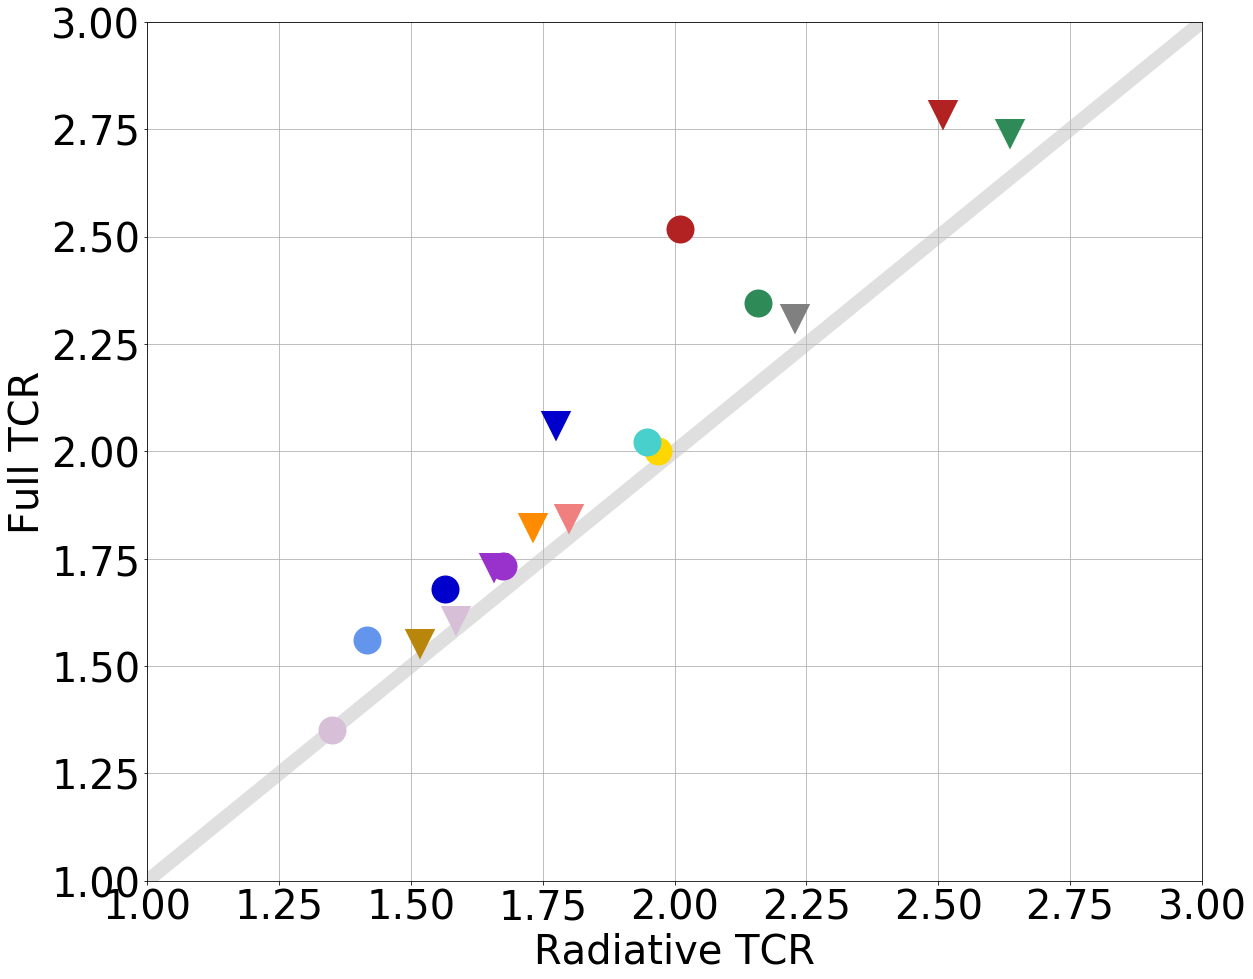

In [6]:
import plot_scatter_rad_vs_full
fig = plot_scatter_rad_vs_full.plot_scatter_rad_vs_full(TCR_DICT,
                                                average_type='global',
                                                xmin=1, ymin=1,
                                                xmax=3, ymax=3,
                                               end_yr=70,
                                               filepath=FIGURE_PATH+'Scatter_rad_vs_full',
                                                       plot_rad_v2=False)